In [10]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import time      # for testing use only
import os         # for testing use only

from bs4 import BeautifulSoup as bs
import pandas as pd
import scipy as sc
import numpy as np
import requests
from lxml import html
import csv

In [11]:
def load_soup_object(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}
    r = requests.get(url,headers=headers)
    soup = bs(r.content, "html.parser")
    return soup


In [12]:
def load_list_pages():
    i = 0
    while(i<1):
        i = i +1
        i_str = str(i)
        url = 'https://www.tripadvisor.com/Restaurants-g60763-oa'+i_str+'-New_York_City_New_York.html#EATERY_LIST_CONTENTS'
        linksToPages.append(url)
        print(i)
    return linksToPages  

In [102]:
url="https://www.tripadvisor.com/Restaurants-g60763-New_York_City_New_York.html"
soup = load_soup_object(url)
linksToPages = []
linksToPages.append(url)

##שמתי לב שהעמוד הבא שלהם כל פעם קופץ בהפרש של 30 אז קידמתי את איי כל סיבוב בלולאה ואני מוסיף את זה ללינק, התנאי בלולאה זה כמה לינקים להוסיף אם נרצה להוסיף את כל העמודים צריך לשים 11,400 בתנאי

i = 0
while(i<10000):
    i = i + 30
    i_str = str(i)
    url = 'https://www.tripadvisor.com/Restaurants-g60763-oa'+i_str+'-New_York_City_New_York.html#EATERY_LIST_CONTENTS'
    linksToPages.append(url)
    #print(url)

print(len(linksToPages))


335


In [103]:

###ניורק
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}

##s הוספתי תנאים של if else כי יש מסעדות שאין להם דירוג או פרמטרים מסויימים ואז הוא נותן שגיאה שאי אפשר לחלץ טקסט

url="https://www.tripadvisor.com/Restaurants-g60763-New_York_City_New_York.html"
soup = load_soup_object(url)
baseUrl="https://www.tripadvisor.com/"

data=[]
for page in linksToPages:
    soup = load_soup_object(page)
    dataList = soup.find_all("div",{"class": "bGnIM"})
    for x in dataList:
        try:
            typeRes=x.find("div",{"class":"bhDlF bPJHV eQXRG"}).find("span",{"class":"ceUbJ"}).text.strip().replace("  ","")
        except:
            typeRes= ' '
        price = priceOfRes('Menu')
        for p in x.find("div",{"class":"bhDlF bPJHV eQXRG"})({'span':"ceUbJ"})[0:5]:
            try:
                if (p.get_text()[0]) == '$':
                    price=priceOfRes(p.get_text().replace("Menu",''))
                    break
            except:
                price=0
        cuisine_sum=cuisine_counter(typeRes)
        rev = x.find("span",{"class":"NoCoR"})
        if rev:
            reviews=x.find("span",{"class":"NoCoR"}).text.strip().replace("reviews","")
        else:
            reviews = ' '
        
        name=x.find("a",{"class":"bHGqj Cj b"}).text.strip()
        cleanName=clean_name(name)
        try:
            location = lNewsoup.find("span",{"class":"brMTW fnrgn"})('div')[0].get_text()
        except:
            location= ' ' 
       
        newUrl=x.find("div",{"class":"OhCyu"}).find("a")["href"]
        lrInPage = requests.get(baseUrl+""+newUrl,headers=headers)
        lNewsoup = bs(lrInPage.content, "html.parser")
        #dataListInPage = lNewsoup.find("div",{"class": "eEwDq"})
        
        rat = lNewsoup.find("span",{"class":"fdsdx"})
        if rat:
            ratingRes=lNewsoup.find("span",{"class":"fdsdx"}).text.strip()
        else:
            ratingRes = 0
            
        rank=lNewsoup.find("div",{"class":"fYCpi"})
        if rank:
            rankInArea=lNewsoup.find("div",{"class":"fYCpi"}).find("span").text.replace("#","")
        else:
            rankInArea = 0    
        ratingByType=lNewsoup.find_all('span', {'class' : 'cwxUN'})
        listsRatings=[]
        for i, value in enumerate(ratingByType,start=0):
            if i==3:
                break
            rating = int(value.find('span','ui_bubble_rating')['class'][1].split('_')[1])/10
            listsRatings.append(rating)
        if listsRatings:
            try:
                foodRating=listsRatings[0]
            except:
                foodRating=0
            try:
                serviceFood=listsRatings[1]
            except:
                serviceFood=0
            try:
                valueFood=listsRatings[2]
            except:
                valueFood=0
                        
        else:
            foodRating=serviceFood=valueFood=0
        typeRess=lNewsoup.find_all("a",{"class":"drUyy"})
        VeganFriendlyType = 0
        VegetarianFriendlyType=0
        GlutenFreeOptionsType=0
        for o in typeRess:
            p=clean_name(o.text.replace("$",""))    
            if p=="Vegetarian Friendly":
                VegetarianFriendlyType=1   
            if p=="Gluten Free Options":
                GlutenFreeOptionsType=1           

       
        rowData={
                "price":price,
                "Location":location,
                "Vegetarian":VegetarianFriendlyType,
                "Gluten":GlutenFreeOptionsType,
                "FoodRating":foodRating,
                "ServiceFood":serviceFood,
                "ValueFood":valueFood,
                "RankingInArea":rankInArea,
                "Ratings":ratingRes,
                "CuisineCount":cuisine_sum,
                "Type":typeRes,
                "NumOfReviews":reviews,
                "Name":cleanName
                }
        data.append(rowData)
time.sleep(10)
df= pd.DataFrame(data)
#fileName='New_York5.csv'
#df.to_csv(fileName, encoding='utf-8', index=False)
df



,price,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,Type,NumOfReviews,Name
0,2.5,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,"American, Seafood","1,078",Burger & Lobster
1,4.0,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,"American, Steakhouse","4,158",Club A Steakhouse
2,2.5,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,"Lebanese, Mediterranean",247,Au Za'atar
3,4.0,Downtown Manhattan (Downtown),0,1,4.5,4.5,4.0,3,4.5,2,"French, Steakhouse","1,065",Boucherie Union Square
4,2.5,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,"Japanese, Asian",173,Mei Jin Ramen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12385,0.0,Downtown Manhattan (Downtown),0,0,0.0,0.0,0.0,0,0,1,,,Blimpie
12386,NaN,Upper Manhattan (Uptown),0,0,0.0,0.0,0.0,0,0,1,Chinese,,Number Chinese Restaurant
12387,NaN,Harlem,0,0,0.0,0.0,0.0,0,0,1,,,Great Sichuan
12388,NaN,Kips Bay,0,0,0.0,0.0,0.0,0,0,2,"Chinese, Japanese",,Sedapsss Fusion Cuisine


In [13]:
##### ניקוי שמות של מסעדות ממספר ונקודה
def clean_name(string):
    newName = ''.join([i for i in string if not i.isdigit() ]).replace(".","")
    return newName


In [14]:
### Types כמות סוגי מטבחים - סופר 
def cuisine_counter(inpStr):
    NumCuisines=len(str(inpStr).split(','))
    return(NumCuisines)

In [15]:
def priceOfRes(s):
    if s == '':
        return None
    elif s == '$$$$':
        return 4
    elif s == '$$$':
        return 3
    elif s == '$$ - $$$':
        return 2.5
    elif s == '$$':
        return 2
    elif s == '$':
        return 1

In [112]:
df.describe()

,price,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,CuisineCount
count,8985.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000
mean,2.266166,0.167312,0.042050,2.382405,2.347135,2.212631,1.553834
std,0.927570,0.373270,0.200711,2.127877,2.109195,2.015490,0.497114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.500000,0.000000,0.000000,4.000000,3.500000,3.500000,2.000000
75%,2.500000,0.000000,0.000000,4.500000,4.500000,4.000000,2.000000
max,4.000000,1.000000,1.000000,5.000000,5.000000,5.000000,2.000000


In [105]:
fileName='dataNew.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

In [113]:
df.isnull().sum()

price            3405
Location            0
Vegetarian          0
Gluten              0
FoodRating          0
ServiceFood         0
ValueFood           0
RankingInArea       0
Ratings             0
CuisineCount        0
Type                0
NumOfReviews        0
Name                0
dtype: int64

In [66]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12390 entries, 0 to 12389
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          8985 non-null   float64
 1   Location       12390 non-null  object 
 2   Vegetarian     12390 non-null  int64  
 3   Gluten         12390 non-null  int64  
 4   FoodRating     12390 non-null  float64
 5   ServiceFood    12390 non-null  float64
 6   ValueFood      12390 non-null  float64
 7   RankingInArea  12390 non-null  object 
 8   Ratings        12390 non-null  object 
 9   CuisineCount   12390 non-null  int64  
 10  Type           12390 non-null  object 
 11  NumOfReviews   12390 non-null  object 
 12  Name           12390 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


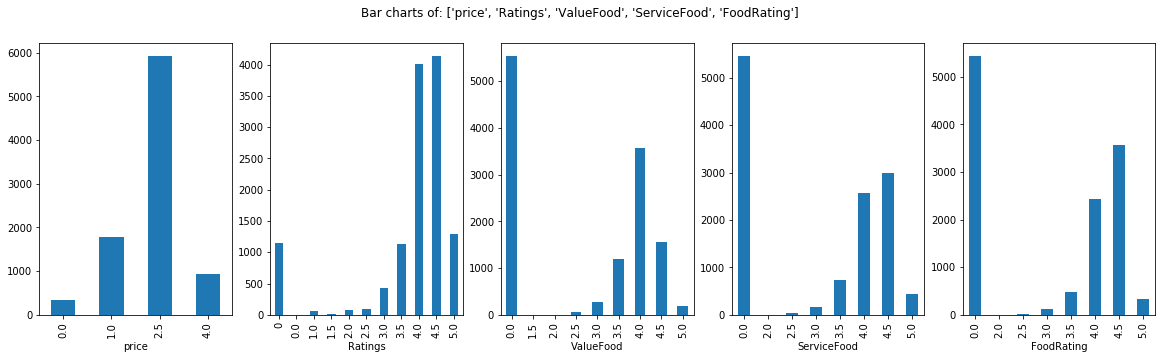

In [107]:
PlotBarCharts(inpData=df, colsToPlot=[ 'price', 'Ratings','ValueFood','ServiceFood','FoodRating'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002421FC6C948>,
      dtype=object)

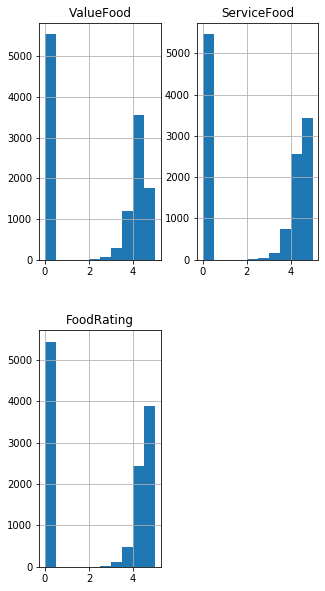

In [108]:
df.hist(['Ratings', 'RankingInArea',
    'ValueFood','ServiceFood','FoodRating'], figsize=(5,10))

In [114]:
dfCsv = pd.read_csv('data2.csv')
dfCopy=dfCsv.copy()
dfCopy.drop_duplicates(keep = 'first', inplace = True)
dfCopy.shape

(11230, 13)